# Multi-variate Time-series Forecasting

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/Users/anilthapa/Downloads/Netflix_Data.csv')

In [34]:
df.head()

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume
0,0,2010-01-04 00:00:00+00:00,7.640000,7.640000,7.961429,7.565714,7.931429,17239600
1,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100
2,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400
3,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400
4,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900


In [35]:
df['Date'] = pd.to_datetime(df['Date']).dt.date.astype(str)

In [36]:
df.columns

Index(['Unnamed: 0', 'Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

In [37]:
df.drop(['Unnamed: 0','Adj_Close','Volume'], axis =1, inplace = True)

In [38]:
df.head()

,Date,Close,High,Low,Open
0,2010-01-04,7.640000,7.961429,7.565714,7.931429
1,2010-01-05,7.358571,7.657143,7.258571,7.652857
2,2010-01-06,7.617143,7.672857,7.197143,7.361429
3,2010-01-07,7.485714,7.757143,7.462857,7.731429
4,2010-01-08,7.614286,7.742857,7.465714,7.498571


In [39]:
df.set_index('Date', inplace=True)

In [40]:
df.sort_index(inplace=True)

In [41]:
df

,Close,High,Low,Open
Date,,,,
2010-01-04,7.640000,7.961429,7.565714,7.931429
2010-01-05,7.358571,7.657143,7.258571,7.652857
2010-01-06,7.617143,7.672857,7.197143,7.361429
2010-01-07,7.485714,7.757143,7.462857,7.731429
2010-01-08,7.614286,7.742857,7.465714,7.498571
...,...,...,...,...
2024-10-29,759.440002,763.880005,748.010010,751.130005
2024-10-30,753.739990,759.789978,752.280029,758.080017
2024-10-31,756.030029,760.789978,752.229981,753.929993


In [42]:
df.isna().any()

Close    False
High     False
Low      False
Open     False
dtype: bool

In [55]:
train = df['2010-01':'2017-12']
valid = df['2018-01':'2018-12']
test = df['2019-01':'2019-12']

In [56]:
length = 56

In [57]:
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train.to_numpy(),
    targets=train[['High', 'Low']][56:],
    sequence_length=length,
    batch_size=32, 
    seed=42, 
    shuffle=True
)

In [58]:
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    valid.to_numpy(),
    targets=valid[['High', 'Low']][56:],
    sequence_length=length,
    batch_size=32
)

# Creating the model

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[None, 4]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    tf.keras.layers.Dense(2)
])

In [68]:
model.compile(loss='huber', optimizer = 'adam', metrics=['mae'])

In [69]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=50)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 60.7758 - mae: 61.2794 - val_loss: 329.5374 - val_mae: 334.8918
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 56.0606 - mae: 56.5530 - val_loss: 327.1623 - val_mae: 332.5167
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 54.4031 - mae: 54.8987 - val_loss: 325.0861 - val_mae: 330.4405
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 52.5788 - mae: 53.0712 - val_loss: 323.2141 - val_mae: 328.5685
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 50.3552 - mae: 50.8514 - val_loss: 321.4458 - val_mae: 326.8003
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 49.4203 - mae: 49.8887 - val_loss: 319.5277 - val_mae: 324.8821
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 47.7547 - mae: 48.2206 - val_loss: 317.6765 - val_mae: 323.0309
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 46.9763 - mae: 47.4252 - val_loss: 315.8456 - val_mae: 321.1999
Epoch 9/50
61/61

In [71]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

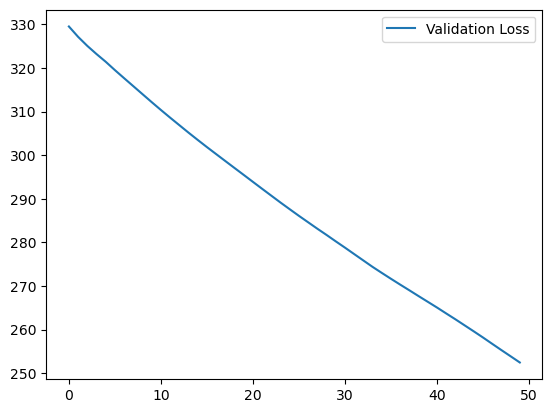

In [74]:
plt.plot(validation_loss, label = 'Validation Loss')

plt.legend()
plt.show()

# Creating a RNN model

# Forecasting Several Time Step Ahead